### Data Exploration

In [2]:
import pandas as pd
import numpy as np

In [54]:
# Connection
import pandas as pd
import numpy as np
import re #importing regex for string parsing
pd.set_option('display.max_columns', None)

#reading website data as csv
buoy_data = pd.read_csv(
    '/Users/errol/Downloads/test_file.txt',
   # 'https://www.ndbc.noaa.gov/data/realtime2/45026.txt',
    sep = r'\s+',
    header = 0,
    index_col = None
)

#dataframe to drop first record since first record represents units of measurements for fields within dataset
df = buoy_data.iloc[1:]
df1 = pd.DataFrame(df)

In [56]:
# renaming fields
df1.rename(columns = {
    '#YY':'Year','MM':'Month','DD':'Day','hh':'Hour','mm':'Minute','WDIR':'Wind_Dir','WSPD':'Wind_Speed','GST':'Wind_Gust','WVHT':'Wave_Height',
    'DPD':'Dominant_Wave_Prd','APD':'Average_Wave_Prd','MWD':'Dominant_Wave_Dir','PRES':'Sea_Level_Pres','ATMP':'Air_Temperature',
    'WTMP':'Surface_Water_Temperature','DEWP':'Dew_Point_Temp','VIS':'Station_Visibility','PTDY':'Pressure_Tendency'
},inplace=True)

# appending timestamp fields
df1.insert(18,'Timestamp',(df1['Year'] + '-' + df1['Month'] + '-' + df1['Day']+ ' ' + df1['Hour'] + ':' + df1['Minute']).astype('str'),True)
df1.insert(19,'yyyy-mm-dd',(df1['Year'] + '-' + df1['Month'] + '-' + df1['Day']).astype('str'))
#df1.insert(20,'yyyy_mm_dd',(df1['Year']+df1['Month']+df1['Day']).astype('int'))

In [58]:
df1.head(10)

,Year,Month,Day,Hour,Minute,Wind_Dir,Wind_Speed,Wind_Gust,Wave_Height,Dominant_Wave_Prd,Average_Wave_Prd,Dominant_Wave_Dir,Sea_Level_Pres,Air_Temperature,Surface_Water_Temperature,Dew_Point_Temp,Station_Visibility,TIDE,Timestamp,yyyy-mm-dd
1,2023,04,07,21,10,1,6.2,7.4,0.72,3.38,99.00,1,1033.6,3.6,4.2,-1.4,99.0,99.00,2023-04-07 21:10,2023-04-07
2,2023,04,07,21,20,2,6.0,7.5,0.74,3.32,99.00,1,1033.6,3.6,4.2,-1.3,99.0,99.00,2023-04-07 21:20,2023-04-07
3,2023,04,07,21,30,8,6.1,7.4,0.70,4.57,99.00,1,1033.6,3.6,4.2,-1.2,99.0,99.00,2023-04-07 21:30,2023-04-07
4,2023,04,07,21,40,4,6.0,7.6,0.74,4.57,99.00,1,1033.4,3.6,4.2,-1.2,99.0,99.00,2023-04-07 21:40,2023-04-07
5,2023,04,07,21,50,6,6.0,7.4,0.68,5.03,99.00,1,1033.5,3.6,4.2,-1.3,99.0,99.00,2023-04-07 21:50,2023-04-07
6,2023,04,07,22,00,10,5.9,7.9,0.72,4.87,99.00,1,1033.3,3.6,4.2,-1.3,99.0,99.00,2023-04-07 22:00,2023-04-07
7,2023,04,07,22,10,10,5.7,7.4,0.66,4.79,99.00,1,1033.2,3.6,4.2,-1.2,99.0,99.00,2023-04-07 22:10,2023-04-07
8,2023,04,07,22,20,11,5.6,7.2,0.69,3.25,99.00,1,1033.2,3.7,4.2,-1.2,99.0,99.00,2023-04-07 22:20,2023-04-07
9,2023,04,07,22,30,11,5.4,7.0,0.70,4.57,99.00,1,1033.1,3.7,4.2,-1.2,99.0,99.00,2023-04-07 22:30,2023-04-07
10,2023,04,07,22,40,8,5.5,6.9,0.65,4.68,99.00,1,1033.1,3.8,4.2,-1.0,99.0,99.00,2023-04-07 22:40,2023-04-07


#### date range

In [62]:
df1['Timestamp'].min(),df1['Timestamp'].max()

('2023-04-07 21:10', '2023-11-05 13:30')

#### Checking for Null Values

In [64]:
df1.isna().sum()

Year                         0
Month                        0
Day                          0
Hour                         0
Minute                       0
Wind_Dir                     0
Wind_Speed                   0
Wind_Gust                    0
Wave_Height                  0
Dominant_Wave_Prd            0
Average_Wave_Prd             0
Dominant_Wave_Dir            0
Sea_Level_Pres               0
Air_Temperature              0
Surface_Water_Temperature    0
Dew_Point_Temp               0
Station_Visibility           0
TIDE                         0
Timestamp                    0
yyyy-mm-dd                   0
dtype: int64

#### Describe Dataset

In [66]:
df1.describe()
# Month of May shows to have the highest frequency...why?

,Year,Month,Day,Hour,Minute,Wind_Dir,Wind_Speed,Wind_Gust,Wave_Height,Dominant_Wave_Prd,Average_Wave_Prd,Dominant_Wave_Dir,Sea_Level_Pres,Air_Temperature,Surface_Water_Temperature,Dew_Point_Temp,Station_Visibility,TIDE,Timestamp,yyyy-mm-dd
count,28171,28171,28171,28171,28171,28171,28171,28171,28171,28171,28171,28171,28171,28171,28171,28171,28171,28171,28171,28171
unique,1,8,31,24,6,361,156,207,280,218,1,362,394,278,223,294,1,1,28171,213
top,2023,05,09,17,10,8,3.8,2.5,0.35,99.00,99.00,352,1017.5,18.9,14.8,15.3,99.0,99.00,2023-11-05 13:30,2023-04-30
freq,28171,4258,983,1214,4866,165,480,577,461,4563,28171,553,282,271,541,246,28171,28171,1,144


In [68]:
df1.dtypes

Year                         object
Month                        object
Day                          object
Hour                         object
Minute                       object
Wind_Dir                     object
Wind_Speed                   object
Wind_Gust                    object
Wave_Height                  object
Dominant_Wave_Prd            object
Average_Wave_Prd             object
Dominant_Wave_Dir            object
Sea_Level_Pres               object
Air_Temperature              object
Surface_Water_Temperature    object
Dew_Point_Temp               object
Station_Visibility           object
TIDE                         object
Timestamp                    object
yyyy-mm-dd                   object
dtype: object

#### Histogram for visual representation of distribution

In [70]:
# converting object df to numeric
df2 = df1.apply(pd.to_numeric,errors = 'coerce')

In [72]:
df2.head(5)

,Year,Month,Day,Hour,Minute,Wind_Dir,Wind_Speed,Wind_Gust,Wave_Height,Dominant_Wave_Prd,Average_Wave_Prd,Dominant_Wave_Dir,Sea_Level_Pres,Air_Temperature,Surface_Water_Temperature,Dew_Point_Temp,Station_Visibility,TIDE,Timestamp,yyyy-mm-dd
1,2023,4,7,21,10,1,6.2,7.4,0.72,3.38,99.0,1,1033.6,3.6,4.2,-1.4,99.0,99.0,NaN,NaN
2,2023,4,7,21,20,2,6.0,7.5,0.74,3.32,99.0,1,1033.6,3.6,4.2,-1.3,99.0,99.0,NaN,NaN
3,2023,4,7,21,30,8,6.1,7.4,0.70,4.57,99.0,1,1033.6,3.6,4.2,-1.2,99.0,99.0,NaN,NaN
4,2023,4,7,21,40,4,6.0,7.6,0.74,4.57,99.0,1,1033.4,3.6,4.2,-1.2,99.0,99.0,NaN,NaN
5,2023,4,7,21,50,6,6.0,7.4,0.68,5.03,99.0,1,1033.5,3.6,4.2,-1.3,99.0,99.0,NaN,NaN


In [74]:
df2.describe()

,Year,Month,Day,Hour,Minute,Wind_Dir,Wind_Speed,Wind_Gust,Wave_Height,Dominant_Wave_Prd,Average_Wave_Prd,Dominant_Wave_Dir,Sea_Level_Pres,Air_Temperature,Surface_Water_Temperature,Dew_Point_Temp,Station_Visibility,TIDE,Timestamp,yyyy-mm-dd
count,28171.0,28171.000000,28171.000000,28171.000000,28171.000000,28171.000000,28171.000000,28171.000000,28171.000000,28171.000000,28171.0,28171.000000,28171.000000,28171.000000,28171.000000,28171.000000,28171.0,28171.0,0.0,0.0
mean,2023.0,7.157928,15.761918,11.487807,24.909304,169.449505,4.758997,6.295208,0.648900,19.319391,99.0,234.771290,1015.590746,16.264318,16.616251,11.311299,99.0,99.0,NaN,NaN
std,0.0,2.033605,8.824262,6.923412,16.884039,110.602266,2.877179,3.764481,3.193297,35.051090,0.0,122.607556,5.972664,5.572743,10.011558,8.495145,0.0,0.0,NaN,NaN
min,2023.0,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,2.000000,99.0,0.000000,994.200000,0.300000,4.200000,-5.500000,99.0,99.0,NaN,NaN
25%,2023.0,5.000000,8.000000,5.000000,10.000000,74.000000,2.700000,3.500000,0.220000,3.060000,99.0,165.000000,1011.900000,12.300000,12.300000,6.600000,99.0,99.0,NaN,NaN
50%,2023.0,7.000000,16.000000,12.000000,30.000000,165.000000,4.300000,5.600000,0.400000,4.040000,99.0,255.000000,1015.800000,17.200000,17.500000,12.400000,99.0,99.0,NaN,NaN
75%,2023.0,9.000000,23.000000,17.000000,40.000000,264.000000,6.400000,8.300000,0.690000,5.820000,99.0,345.000000,1019.300000,20.700000,21.700000,16.100000,99.0,99.0,NaN,NaN
max,2023.0,11.000000,31.000000,23.000000,50.000000,360.000000,99.000000,99.000000,99.000000,99.000000,99.0,999.000000,1033.600000,28.200000,999.000000,999.000000,99.0,99.0,NaN,NaN


array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Day'}>,
        <Axes: title={'center': 'Hour'}>],
       [<Axes: title={'center': 'Minute'}>,
        <Axes: title={'center': 'Wind_Dir'}>,
        <Axes: title={'center': 'Wind_Speed'}>,
        <Axes: title={'center': 'Wind_Gust'}>],
       [<Axes: title={'center': 'Wave_Height'}>,
        <Axes: title={'center': 'Dominant_Wave_Prd'}>,
        <Axes: title={'center': 'Average_Wave_Prd'}>,
        <Axes: title={'center': 'Dominant_Wave_Dir'}>],
       [<Axes: title={'center': 'Sea_Level_Pres'}>,
        <Axes: title={'center': 'Air_Temperature'}>,
        <Axes: title={'center': 'Surface_Water_Temperature'}>,
        <Axes: title={'center': 'Dew_Point_Temp'}>],
       [<Axes: title={'center': 'Station_Visibility'}>,
        <Axes: title={'center': 'TIDE'}>,
        <Axes: title={'center': 'Timestamp'}>,
        <Axes: title={'center': 'yyyy-mm-dd'}>]], dtype=object)

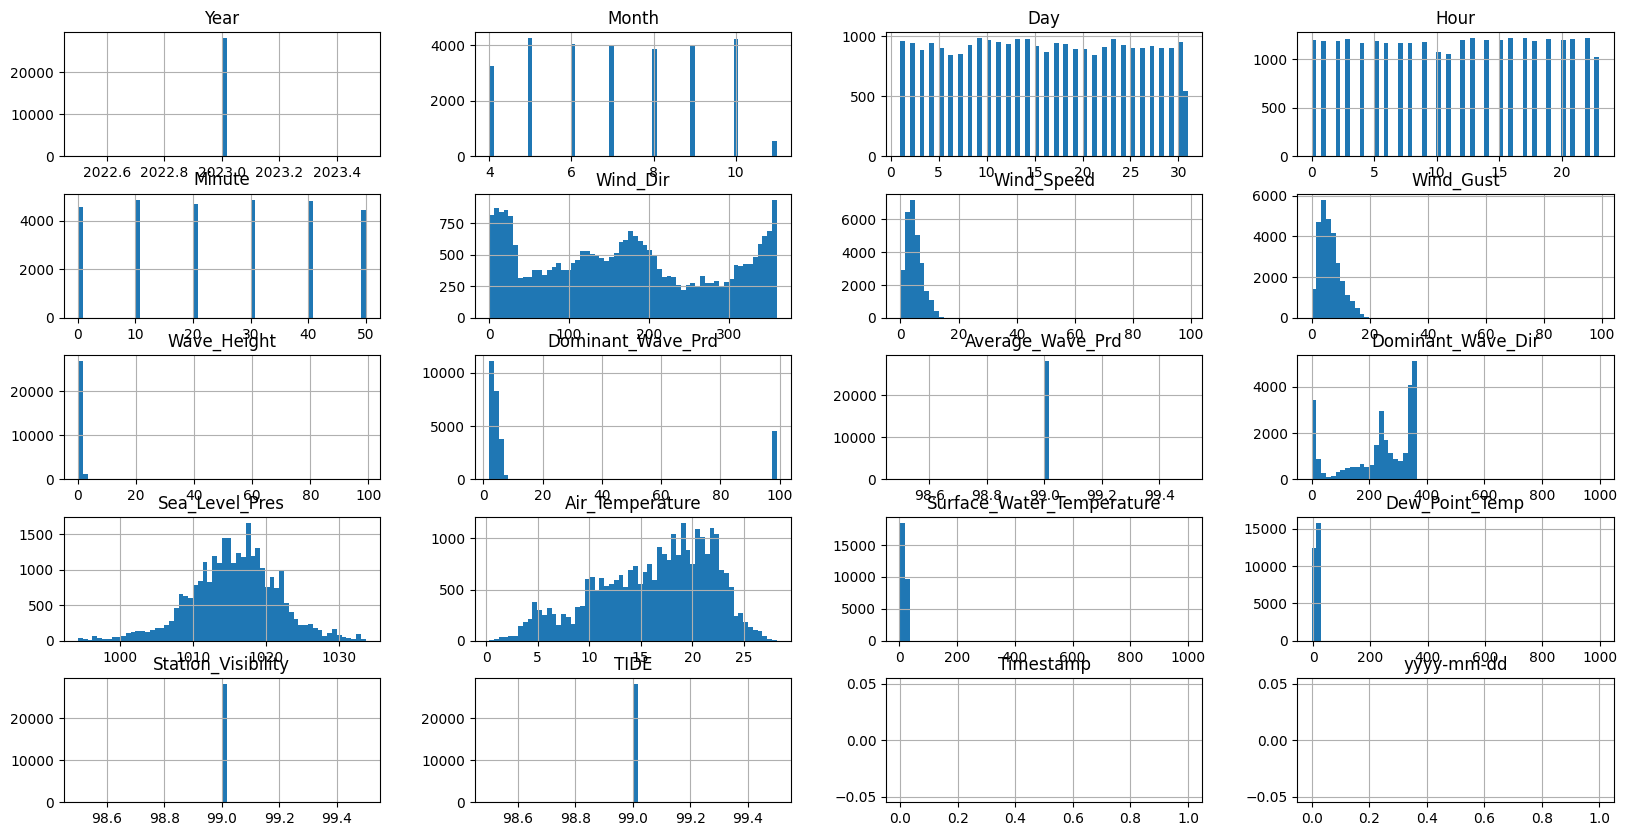

In [76]:
df2.hist(bins=60,figsize=(20,10))

#### Histogram Notes

Wind Direction: x axis represents direction in degrees, 0 degrees = N, 90 degrees = S, 180 = W, 360 = N..etc; y axis represents frequency of the bucket values.  So between 0 and 10 degrees accounts for more than 750 recordings of a NW wind direction; whereas a higher frequency of records show a 360 degree wind, so wind shifting from the North

Air Temperature: slightly skewed towards warmer temperatures with peak round 20 degrees celcius give or take

In [90]:
df2['Wind_Speed']

1        6.2
2        6.0
3        6.1
4        6.0
5        6.0
        ... 
28167    3.6
28168    4.0
28169    3.9
28170    3.4
28171    2.6
Name: Wind_Speed, Length: 28171, dtype: float64

In [92]:
min(df2['Wind_Speed']),max(df2['Wind_Speed']) #wind direction values as this represents direction in degrees

(0.0, 99.0)